In [105]:
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sea
import pandas as pd
import datetime as dt
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings

In [106]:
# Loading the loan data and converting into dataframe
loan_df = pd.read_csv('loan.csv')

In [107]:
loan_df.head() # Print the loan Data
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [108]:
# We can see that there are no headers or summary row presents from above dataframe. Check for footers rows.
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get the shape of the data set

In [109]:
## Number of rows is 39717, and columns is 111.
loan_df.shape

(39717, 111)

In [110]:
total_rows = len(loan_df)
total_rows

39717

In [111]:
# To check if there are any unnessasry rows present in the data set
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [112]:
# Dropping the rows for loan_status == 'Current' since the loan is in progress status and cannot contribute to default state
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print("Total number of rows now:", len(loan_df)) ## Current total number of rows

Total number of rows now: 38577


In [113]:
rows_deleted = ((total_rows- len(loan_df))*100)/total_rows ## Number of rows deleted
print("% of rows deleted:",round(rows_deleted,2))

% of rows deleted: 2.87


In [114]:
# Check if there are any duplicate rows
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


### 1.2 Delete the Uneccessasry Columns

In [115]:
loan_df.shape # Get the shape of data
# Total number of rows = 38577 and total number of columns = 111

(38577, 111)

In [116]:
# Check each column and find if there are any NULL or Blank fields
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [14]:
# Check the total number of columns with NA value

In [117]:
print("Total columns with values NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA colums List:")
na_columns

Total columns with values NA:  55
NA colums List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [118]:
# Delete the columns which have the row values as NA
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [119]:
# Delete the rows which have the columns values as NA
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [120]:
# Delete all the columns whose value is unique

unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns

['id', 'member_id', 'url']

In [121]:
# Delete 'member_id', and 'url' as it doesn't contribute to the analysis 
loan_df.drop(['url','member_id'],axis = 1, inplace = True)

In [122]:
loan_df.shape

(38577, 54)

In [21]:
# Delete the columns which have fields with text or description values as they don't contribute to the analysis

In [123]:
loan_df.drop(columns = ['desc','title'],inplace = True)
loan_df.shape

(38577, 52)

In [124]:
# The analysis shall be limited to the Group level. Hence deleting the subgroups
loan_df = loan_df.drop(['sub_grade'],  axis = 1)

In [125]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields
behavioural_cols = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

# Dropping the columns, ignoring any columns that are not present
loan_df = loan_df.drop(behavioural_cols, axis=1)

# Display the updated DataFrame
print(loan_df.head())

        id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
5  1075269       5000         5000           5000.0   36 months    7.90%   

   installment grade             emp_title emp_length  ...  \
0       162.87     B                   NaN  10+ years  ...   
1        59.83     C                 Ryder   < 1 year  ...   
2        84.33     C                   NaN  10+ years  ...   
3       339.31     C   AIR RESOURCES BOARD  10+ years  ...   
5       156.46     A  Veolia Transportaton    3 years  ...   

  mths_since_last_delinq  mths_since_last_record initial_list_status  \
0                    NaN                     NaN                   f   
1                    NaN  

In [126]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [127]:
# Find the columns whose values are 1 and delete them as well
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
print("-------------")
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [128]:
# Dropping the columns which have more than 50% of NULL values
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis = 1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [129]:
# Delete 'emp_title' as it has description or textual informations and doesn't participate in the analysis
loan_df = loan_df.drop(['emp_title'], axis = 1)

##  2. Data Conversion Process

In [130]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [131]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [132]:
# Convert term from string to int.
def clean_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(clean_term) ## removing the string parts of int value
loan_df['term'].dtype

dtype('int64')

In [133]:
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [134]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [135]:
# Convert int_rate from string to float
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype(float)

In [136]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [137]:
# Convert the column loan_funded_amnt and funded_amnt to flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [138]:
# Check the grade datatype
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [139]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [140]:
# Rounding off the belows columns to two decimals points
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))
    print(loan_df[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [141]:
# Converting 'issue_d' to date type
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format = '%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [142]:
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## 3. Dropping the rows

In [143]:
# Dropping the null rows for 'emp_length' and 'pub_rec_bankruptcies' columns as number of null rows are very less
prev_rows = len(loan_df)
prev_rows

38577

In [144]:
loan_df = loan_df[loan_df['emp_length'].notna()]
loan_df = loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [145]:
after_rows = len(loan_df)
total_deleted = ((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [146]:
(loan_df.isnull().sum()*100)/len(loan_df) # Check for NA

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [147]:
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : strip_emp_length(x))

In [148]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


## 4. Derived Columns

In [149]:
# Create dervied columns for issue month and issue year from issues date
loan_df['issue_year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

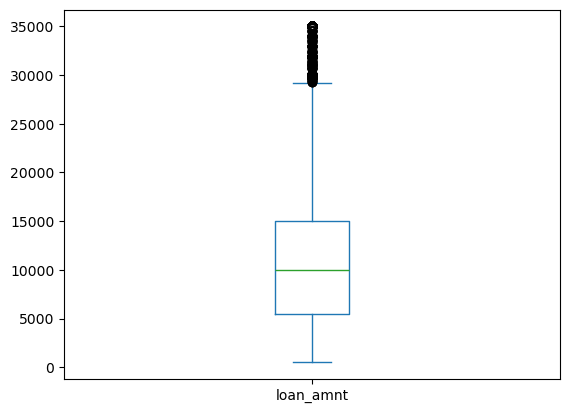

In [150]:
print(loan_df.shape)
print(loan_df["loan_amnt"].describe())
loan_df['loan_amnt'].plot(kind ='box')

## 5. Univariate Analysis

In [151]:
# Column metadata used by the functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [51]:
#Bucketing different variables for better analysis

In [152]:
# Bucketting the Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [153]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [154]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [155]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [156]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

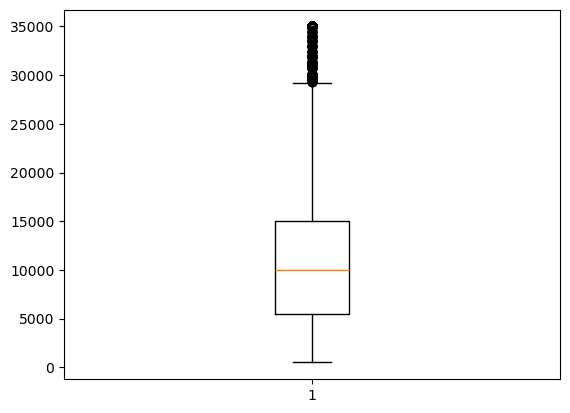

In [157]:
plot.boxplot(loan_df['loan_amnt'],)
plot.show()

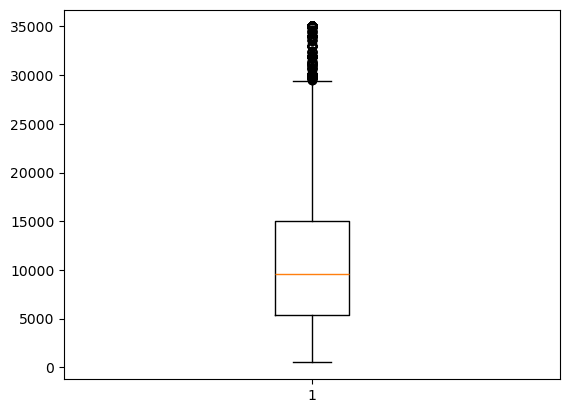

In [158]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

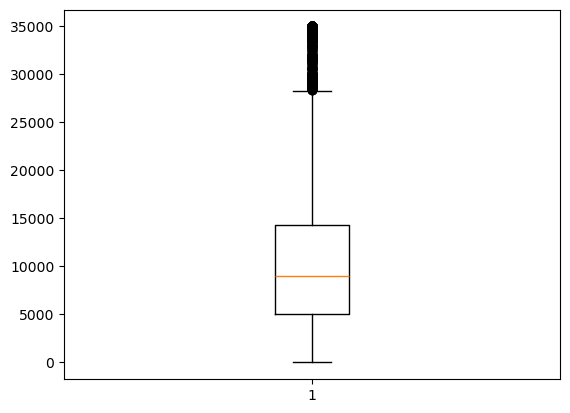

In [159]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

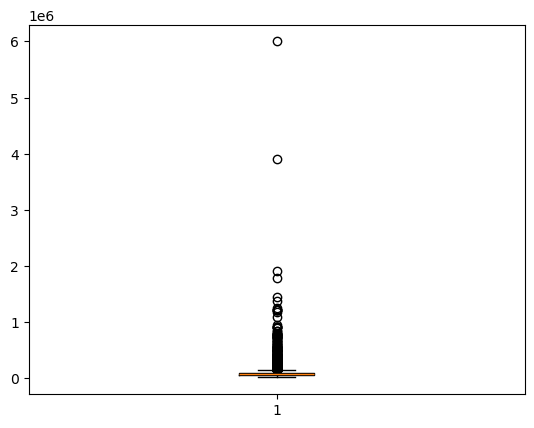

In [160]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

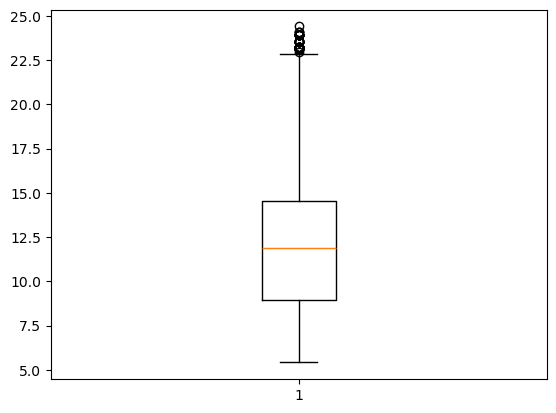

In [161]:
plot.boxplot(loan_df['int_rate'])
plot.show()

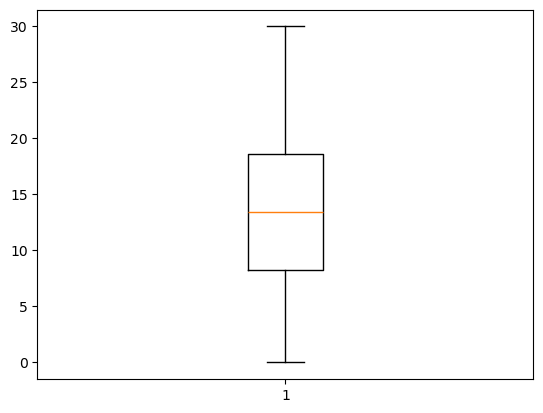

In [162]:
plot.boxplot(loan_df['dti'])
plot.show()

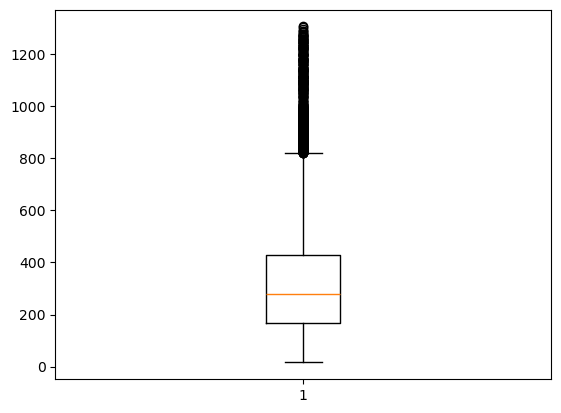

In [163]:
plot.boxplot(loan_df['installment'])
plot.show()

In [164]:
# From the above box plots, we can see that there are outliers in columns 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', etc,.
# Remove the outliers
outliers_columns_set1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2 = ['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove the outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)

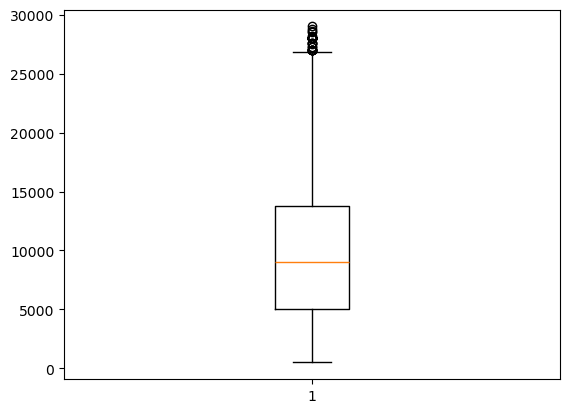

In [165]:
plot.boxplot(loan_df['loan_amnt'])
plot.show()

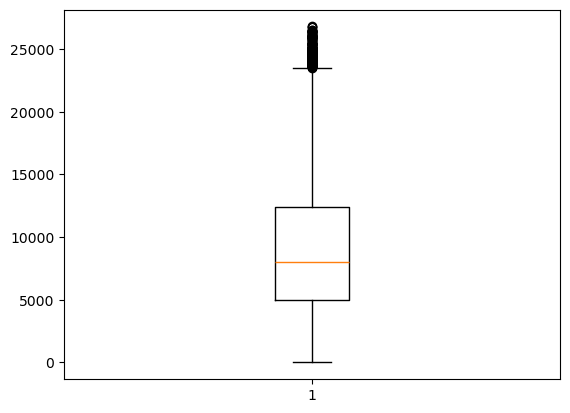

In [166]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

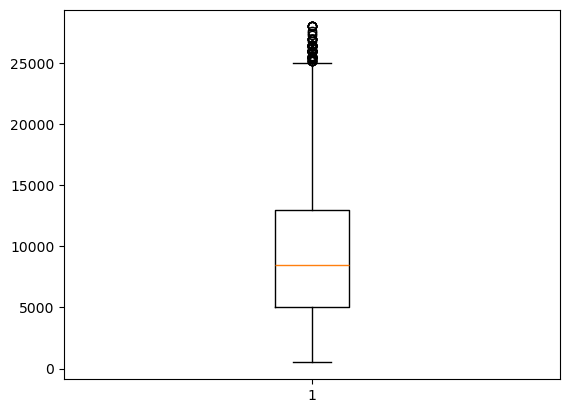

In [167]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

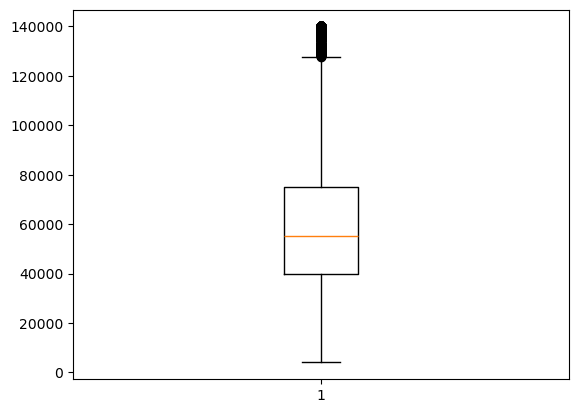

In [168]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

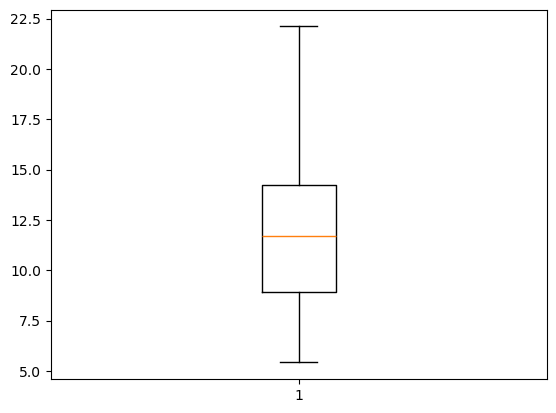

In [169]:
plot.boxplot(loan_df['int_rate'])
plot.show()

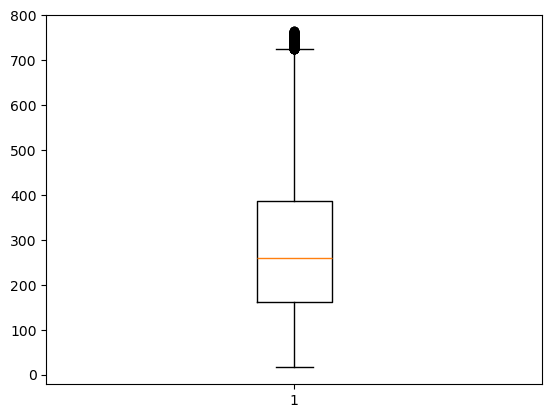

In [170]:
plot.boxplot(loan_df['installment'])
plot.show()

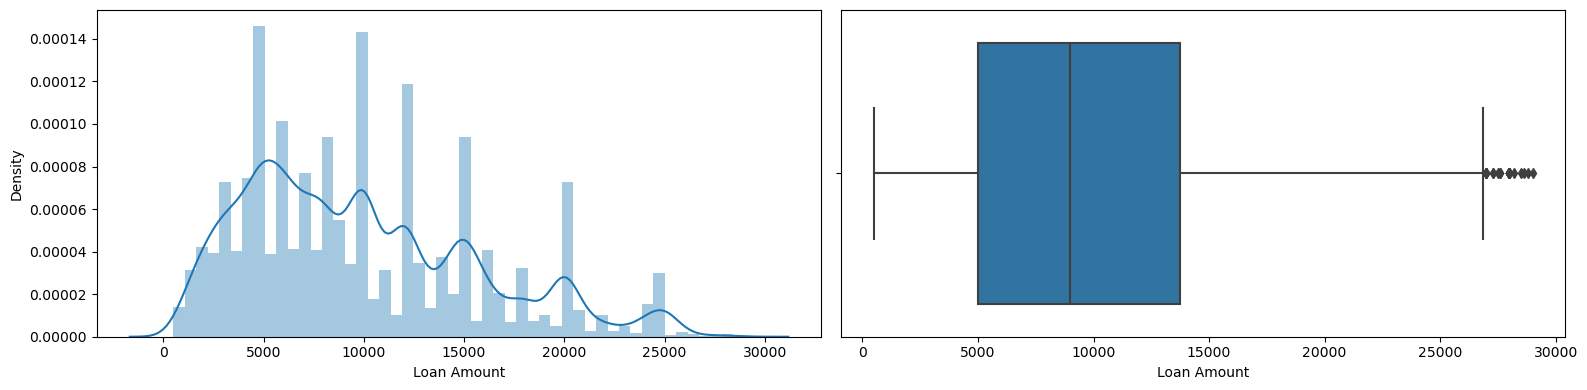

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [171]:
plot_digram(loan_df, 'loan_amnt')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
loan_df['loan_amnt'].describe()

In [172]:
# observation:
# Most of the loan amount applied was in the range of 5k-14k.
# Max Loan amount applied was ~27k.

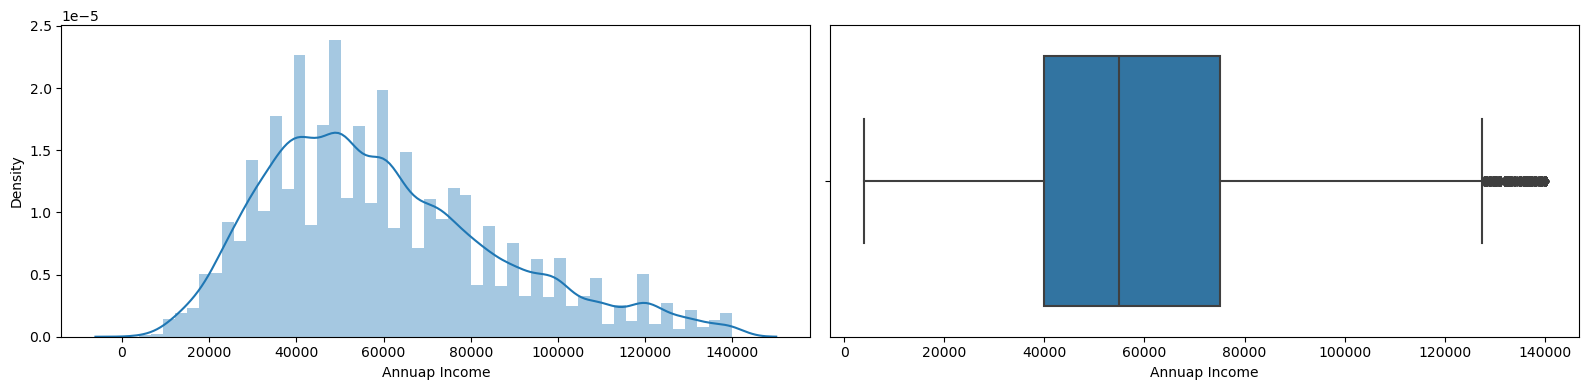

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [173]:
plot_digram(loan_df, 'annual_inc')
#print(loan_df["loan_amnt"].mean())
# describe the annual income details
loan_df['annual_inc'].describe()

In [174]:
# The Annual income of most of the applicants lies between 40k-75k
print("Average Anual Income is :", round(loan_df['annual_inc'].mean(),0))

Average Anual Income is : 59883.0


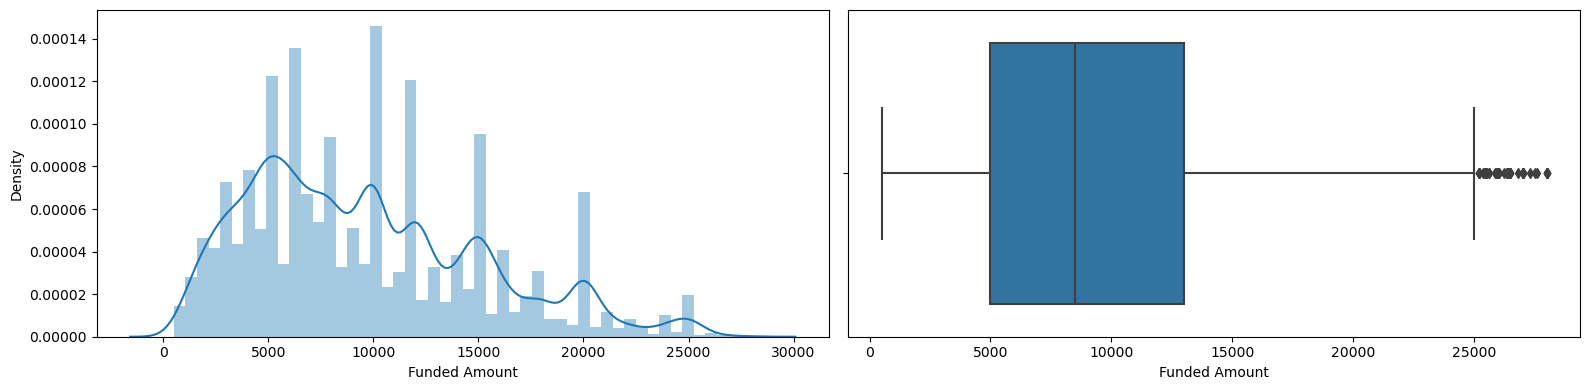

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [175]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

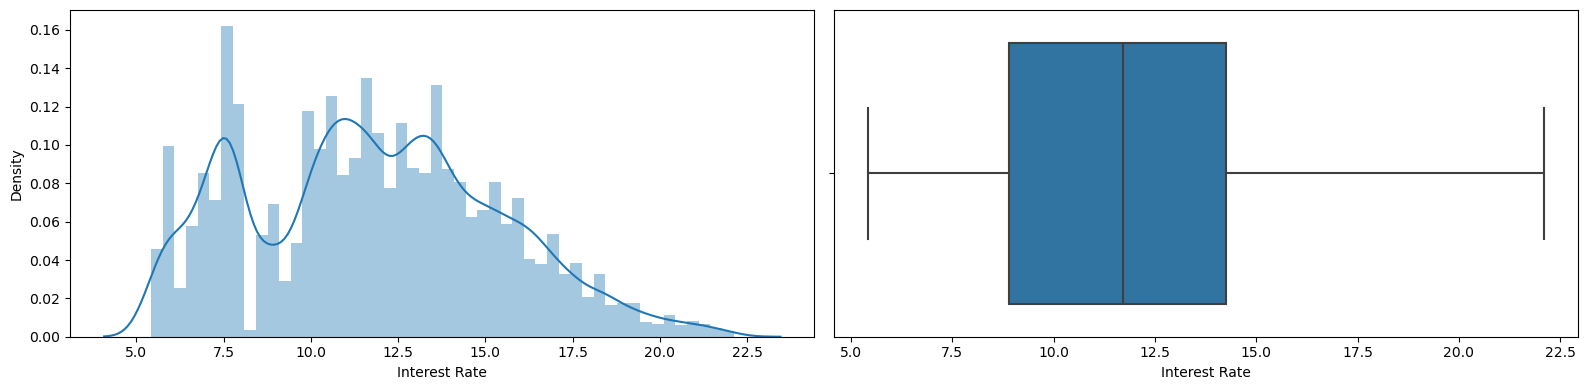

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [176]:
plot_digram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

In [77]:
# Most of the applicant's rate of interesrt is between the range of 8%-14%
# Average Rate of interest of rate is 11.7%

### 5.2 Unordered Categorical Variable Analysis

<Axes: xlabel='home_ownership'>

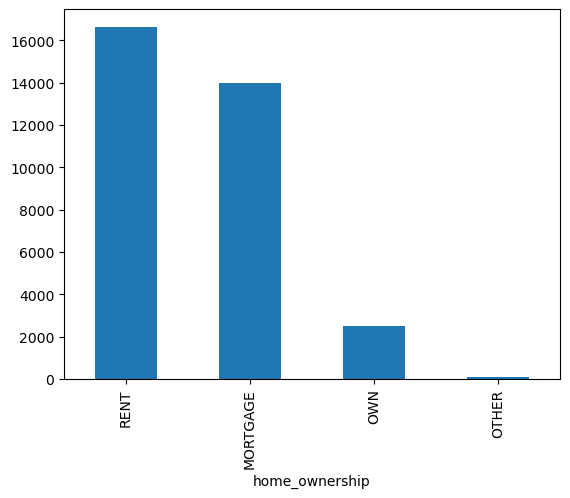

In [177]:
loan_df['home_ownership'].value_counts().plot.bar()

In [79]:
# Majority of loan applicants are either living on Rent or on Mortgage

<Axes: xlabel='purpose'>

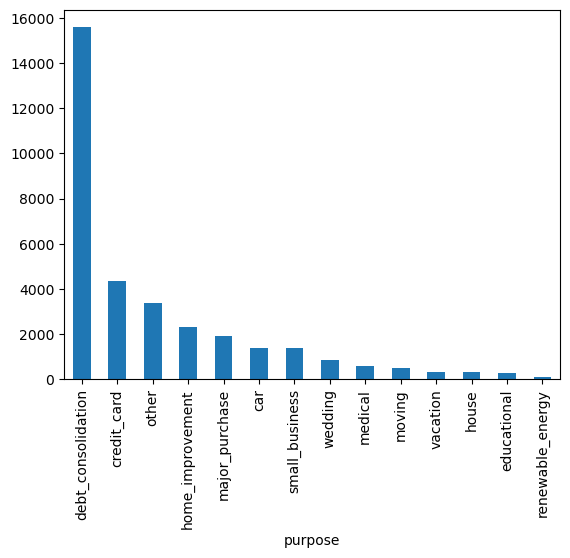

In [178]:
loan_df['purpose'].value_counts().plot.bar()

In [81]:
# Most of the loan applicants are for debt_consolidations

In [179]:
Failed_per_houseowner_ship = loan_df
Failed_per_houseowner_ship["loan_status"].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

<Axes: ylabel='count'>

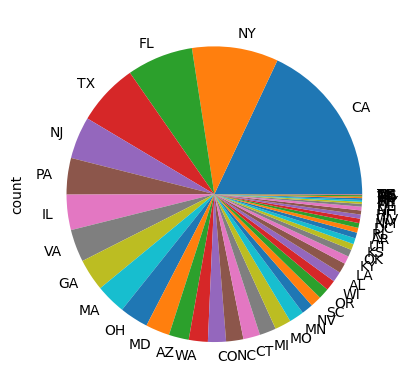

In [180]:
#using Pie plot to visualize
loan_df['addr_state'].value_counts().plot(kind = "pie")

In [84]:
# Most of the Loan applicants are from CA(State).

#### 5.3 Ordered Categorical Variable Analysis

<Axes: ylabel='count'>

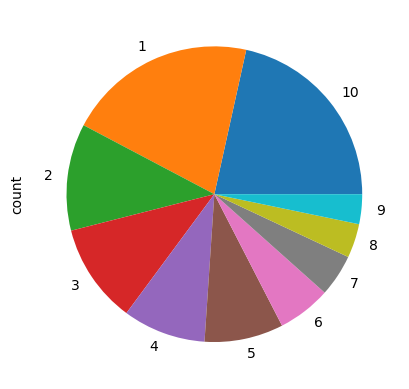

In [181]:
loan_df['emp_length'].value_counts().plot(kind="pie")

In [86]:
# Most of the applications are having 10+ years of experience

## 6.  Bivariate Analysis

In [182]:
#Bivariate Analysis on annual income against Chargedoff_Proportions

inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


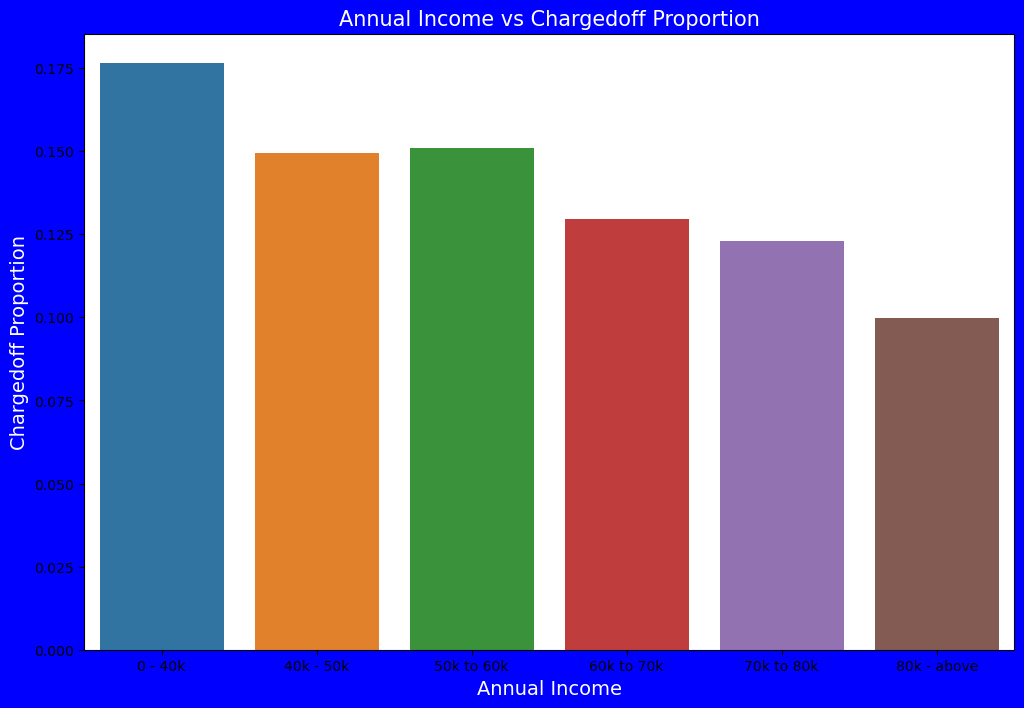

In [183]:
# Draw the bar plots on data calculated above

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# With increase in annual income, the charged off proportion got decreased

In [184]:
#Bivariate Analysis on Intrest rate against Chargedoff_Proportions

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


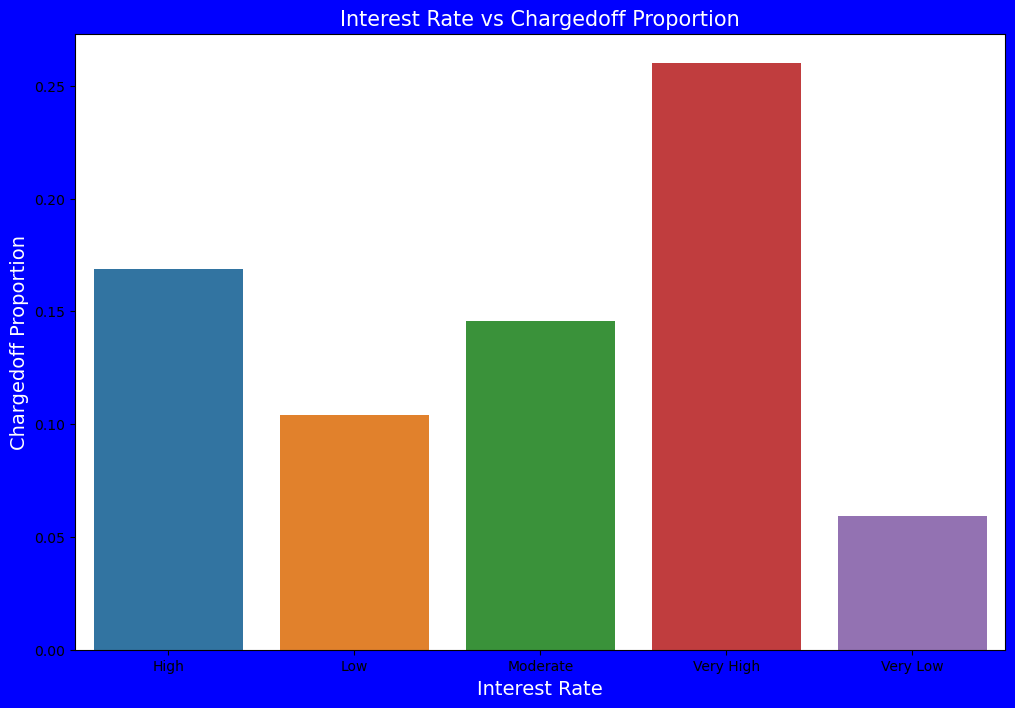

In [185]:
## Plotting
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor ='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'int_rate_b', y = 'Chargedoff_Proportion', data = interest_vs_loan)
ax1.set_xlabel('Interest Rate', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color = 'w')
plot.show()

# Observations:
# Interest rate less than 10% or very low has very less chances of charge off. Intrest rates are starting from minimin 5%
# Interest rate more than 16% or very high has good chances of charge off as compared to other category intrest rates
# Charged off proportion is increasing with higher interest rates

Another inference from the 'houseowner' variable. Those who are not owning the house are most likely to be charged off

In [186]:
# Bivariate Analysis of Home Ownership against Chargedoff_Proportions

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off'] + home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


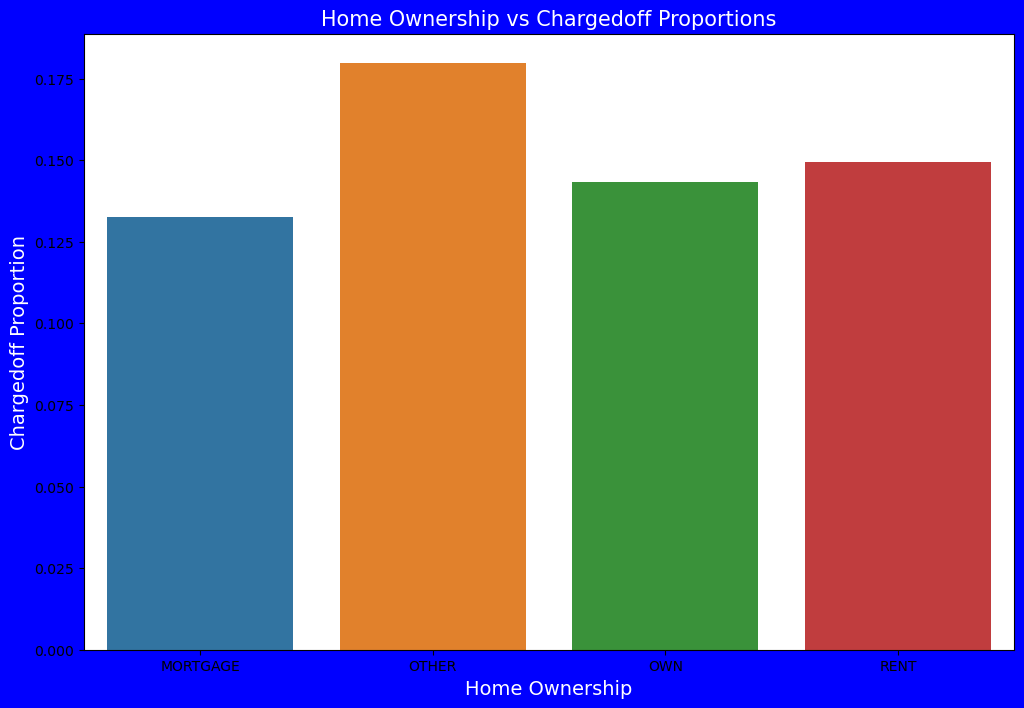

In [187]:
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('Home Ownership vs Chargedoff Proportions', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'home_ownership', y = 'Chargedoff_Proportion', data = home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.show()

In [93]:
# Observation:
# Those who are not owning the home are having high chances of entering loan defaults

In [188]:
# Bivariate Analysis on Purpose of loan against Chargedoff_Proportions
purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


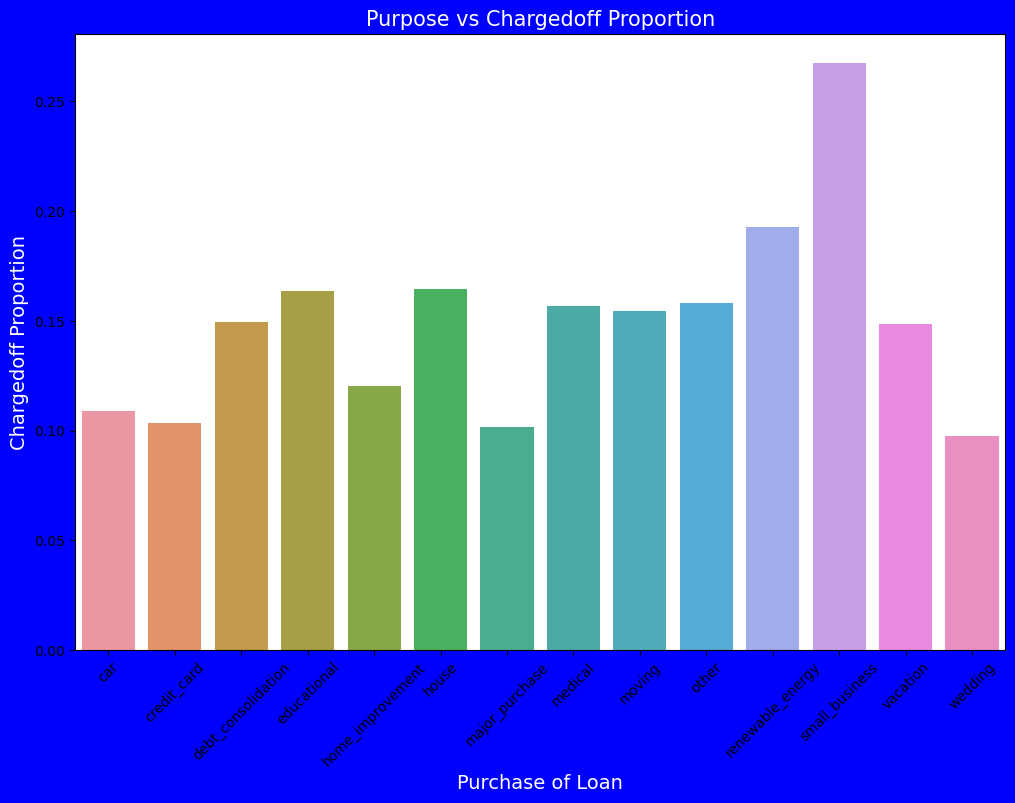

In [189]:
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('Purpose vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'purpose', y = 'Chargedoff_Proportion', data = purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [96]:
# 1.Those applicants who are having home loan are having low chances of entering loan defaults
# 2.Those applicants having loan for small bussiness are having high chances for entering loan defaults

In [190]:
# Bivariate Analysis on DTI against Chargedoff_Proportion
dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


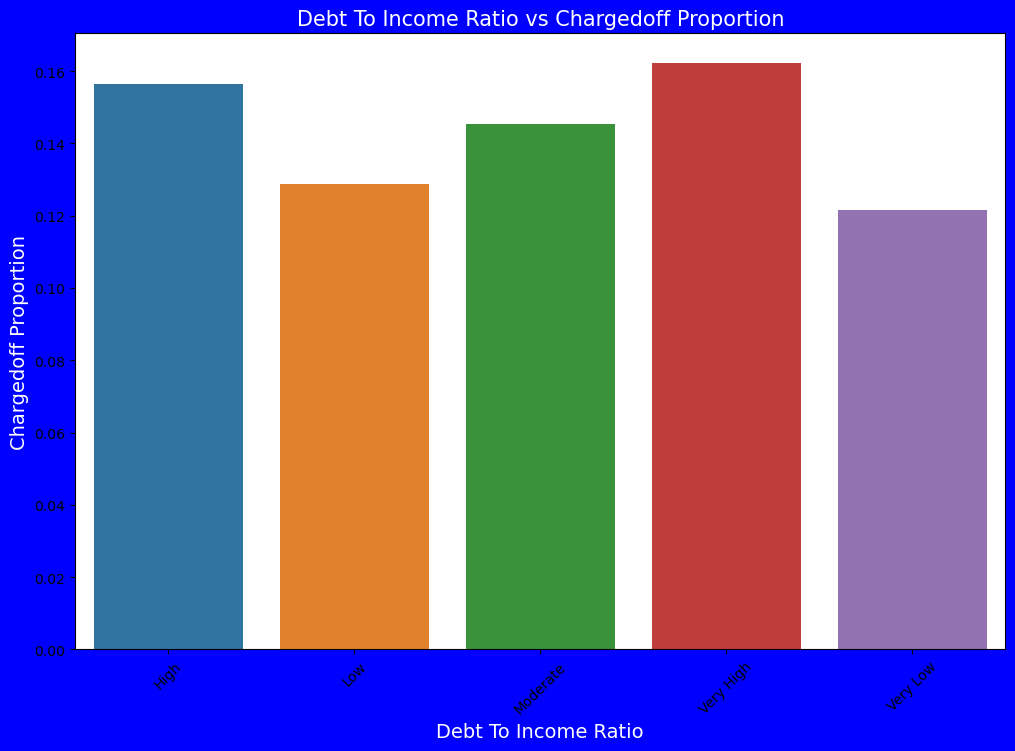

In [191]:
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'dti_b', y = 'Chargedoff_Proportion', data = dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [99]:
# Observations
# 1.High DTI value is projecting a high risk of defaults
# 2.Lower the DTO is projecting low chances of entering a loan defaults

In [192]:
loan_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

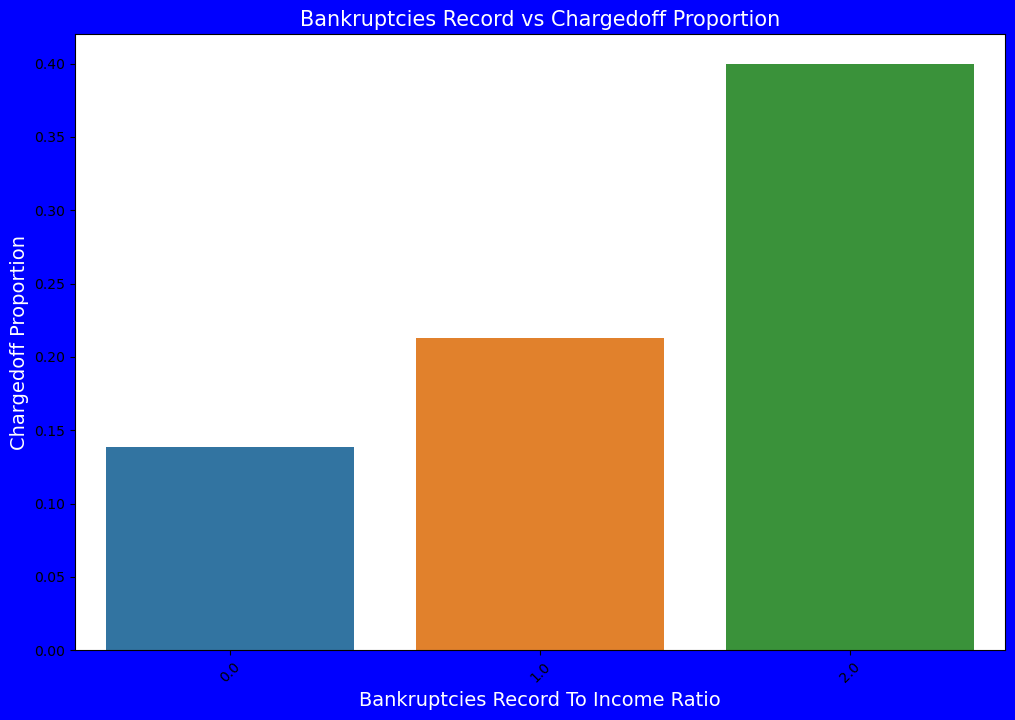

In [193]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportions
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off'] + pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# graph
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'pub_rec_bankruptcies', y = 'Chargedoff_Proportion', data = pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [102]:
# Observations
# 1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk

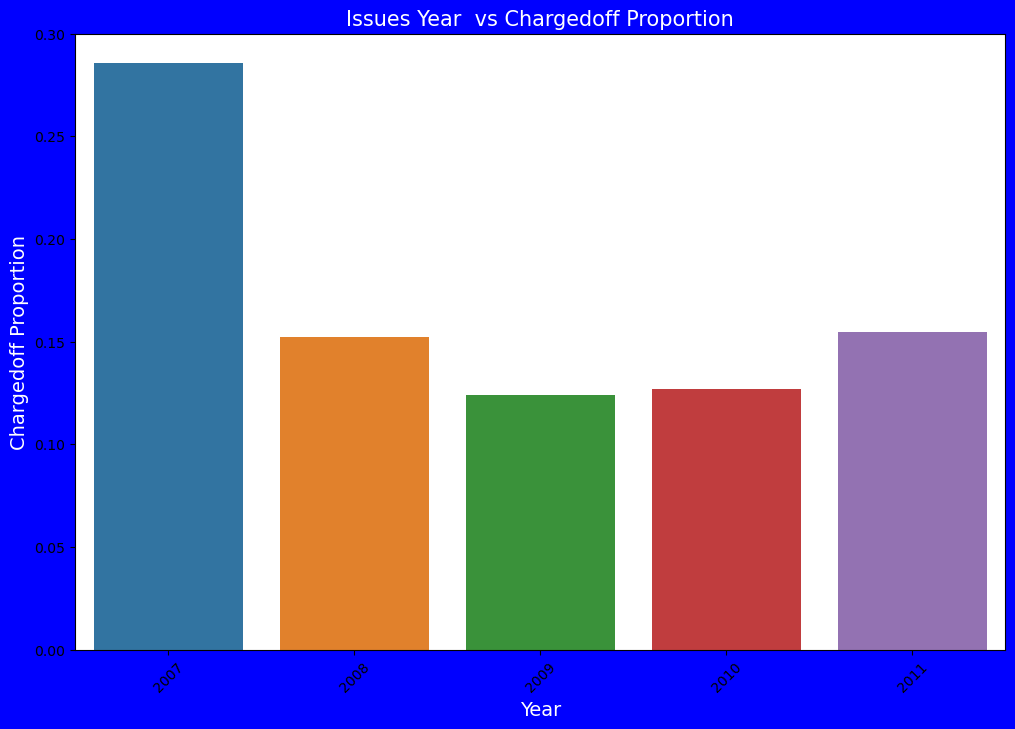

In [194]:
## Bivariate Analysis on Issues of Year  against Chargedoff_Proportion

issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off'] + issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# graph
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('Issues Year  vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'issue_year', y = 'Chargedoff_Proportion', data = issue_year_vs_loan)
ax1.set_xlabel('Year', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [104]:
# Year 2007 has the highest loan defaults and year 2009 is having the lowest loan defaults

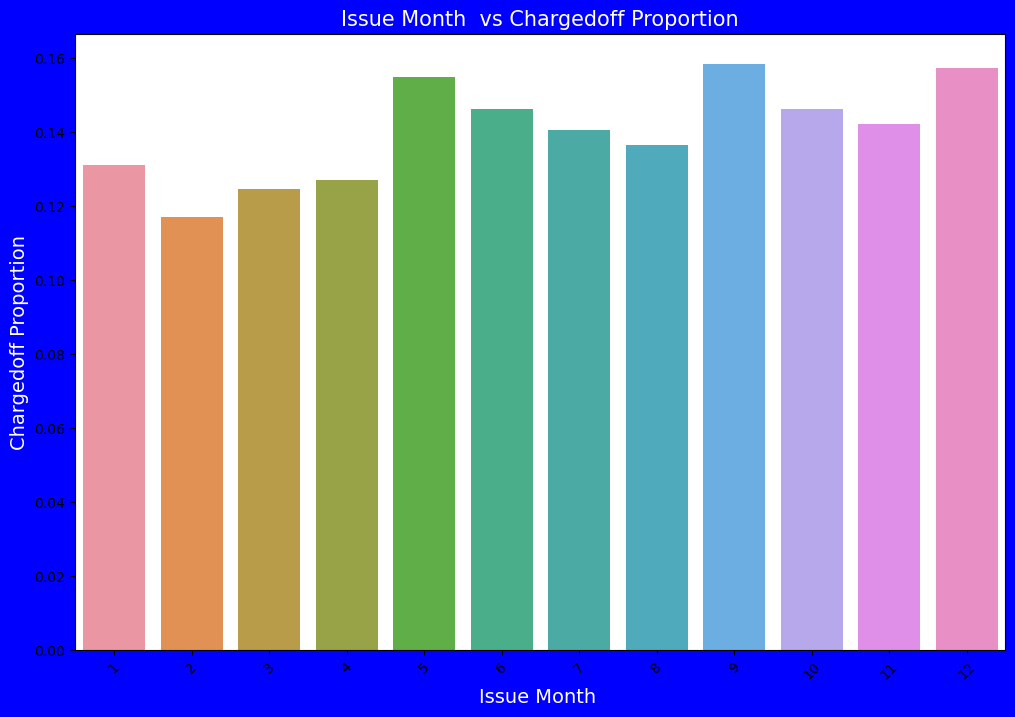

In [195]:
## Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off'] + issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# Graph
fig, ax1 = plot.subplots(figsize=(12, 8), facecolor = 'b')
ax1.set_title('Issue Month  vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'issue_month', y = 'Chargedoff_Proportion', data = issue_month_vs_loan)
ax1.set_xlabel('Issue Month ', fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [196]:
## Bivariate Analysis on Address state against Chargedoff_Proportions

In [106]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
# 3. Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

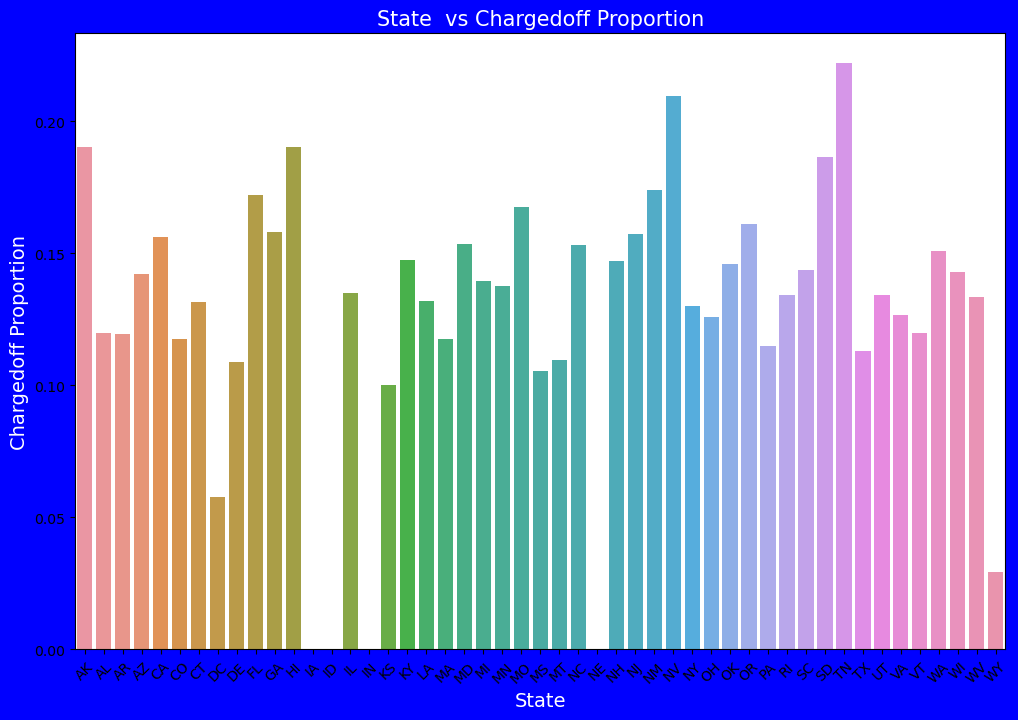

In [197]:
## Bivariate Analysis on Address state against Chargedoff_Proportions

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# graph
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('State  vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'addr_state', y = 'Chargedoff_Proportion', data = addr_state_vs_loan)
ax1.set_xlabel('State',fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [108]:
# Observations
# 1.DE States is holding the highest number of loan defaults
# 2.CA is having the lowest number of loan defaults

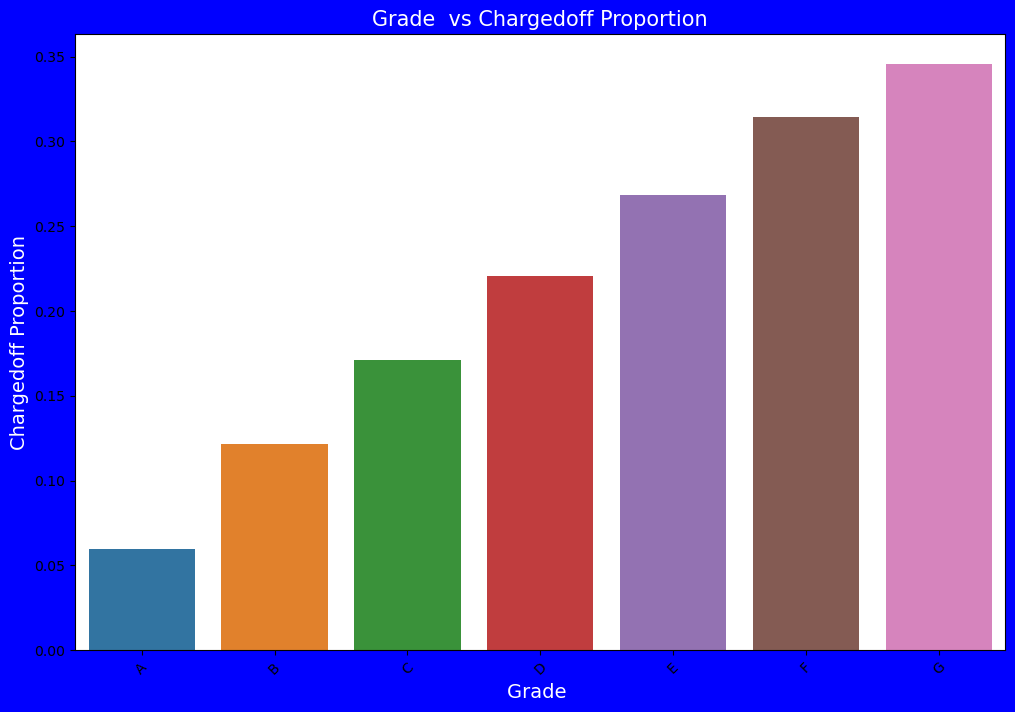

In [198]:
## Bivariate Analysis on Grade against Chargedoff_Proportion

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

# Graph
fig, ax1 = plot.subplots(figsize = (12, 8), facecolor = 'b')
ax1.set_title('Grade  vs Chargedoff Proportion', fontsize = 15, color = 'w')
ax1 = sea.barplot(x = 'grade', y = 'Chargedoff_Proportion', data = grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize = 14, color = 'w')
ax1.set_ylabel('Chargedoff Proportion', fontsize = 14, color = 'w')
plot.xticks(rotation = 45)
plot.show()

In [110]:
    # observations
    # 1.The Loan applicants with loan Grade G is having the higest Loan Defaults
    # 2.The Loan applicants with loan A is having the lowest Loan Defaults

## 7.  Correlation Analysis

In [203]:
# Correlation Analysis

In [112]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

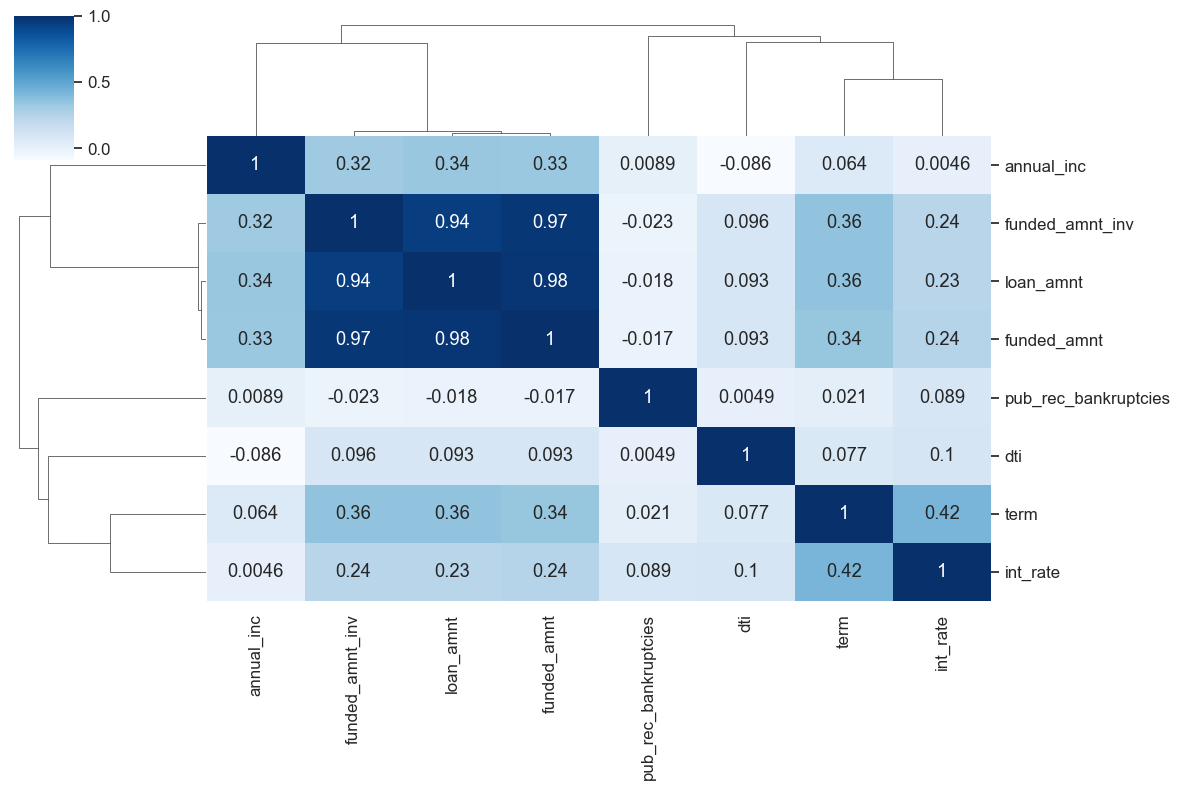

In [113]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

Negative Correlation:
1. The 'Loan_amnt' has negative correlation with 'pub_rec_bankrupticies'
2. 'Annual income' has a negative correlation with 'dti'

Strong Correlation:
1. 'Term' has a strong correlation with 'loan amount'
2. 'Term' has a strong correlation with 'interest rate'
3. 'Annual income' has a strong correlation with 'loan_amount'

<Axes: xlabel='term', ylabel='loan_amnt'>

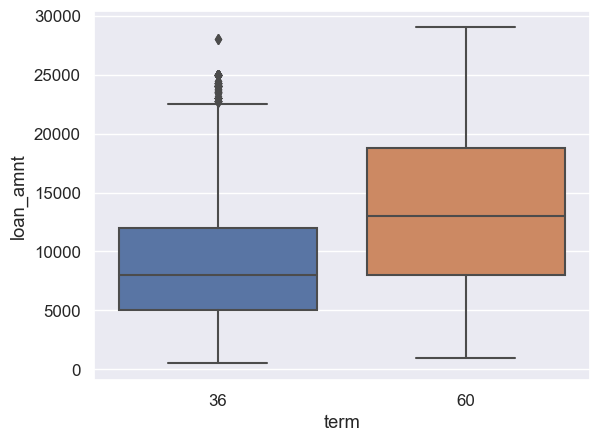

In [114]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

From the above box plot, we see that, as the term increases the loan amount also increases

<Axes: xlabel='term', ylabel='int_rate'>

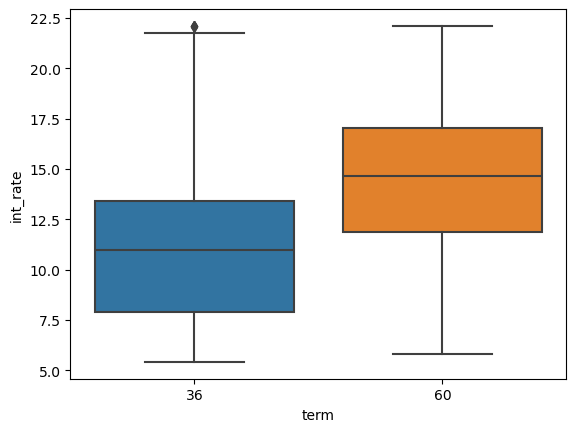

In [202]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)